# Basel MRI Dataset

Akinci D’Antonoli, T., Todea, R. A., Leu, N., Datta, A. N., Stieltjes, B., Pruefer, F., & Wasserthal, J. (2023). Development and evaluation of deep learning models for automated estimation of myelin maturation using pediatric brain MRI scans. Radiology: Artificial Intelligence, 5(5), e220292.

https://pubs.rsna.org/doi/10.1148/ryai.220292

https://zenodo.org/records/8055666

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import nibabel as nib
import seaborn as sns

In [6]:
# Load the dataset
file_path = r'..\..\Datasets\Basel_mri\meta.csv'
df = pd.read_csv(file_path, sep=';')
df.head()

,image_id,myelinisation,age,age_corrected,doctor_predicted_age,diagnosis,group
0,s0001,normal,22,22,22,normal,train
1,s0002,normal,29,29,29,normal,train
2,s0003,normal,4,4,4,normal,train
3,s0004,normal,0,0,0,normal,train
4,s0005,normal,0,0,0,normal,train


In [7]:
df.describe(include='all')

,image_id,myelinisation,age,age_corrected,doctor_predicted_age,diagnosis,group
count,833,833,833.000000,833.000000,833.000000,833,833
unique,833,2,NaN,NaN,NaN,73,2
top,s0833,normal,NaN,NaN,NaN,normal,train
freq,1,829,NaN,NaN,NaN,565,710
mean,NaN,NaN,13.722689,13.668667,13.669868,NaN,NaN
std,NaN,NaN,11.754957,11.795154,11.795748,NaN,NaN
min,NaN,NaN,0.000000,-1.000000,-1.000000,NaN,NaN
25%,NaN,NaN,3.000000,3.000000,2.000000,NaN,NaN
50%,NaN,NaN,12.000000,12.000000,12.000000,NaN,NaN
75%,NaN,NaN,24.000000,24.000000,24.000000,NaN,NaN


C:\Users\natha\AppData\Local\Temp\ipykernel_29912\4126483834.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='diagnosis_group', y='age', data=df, palette='Set2')


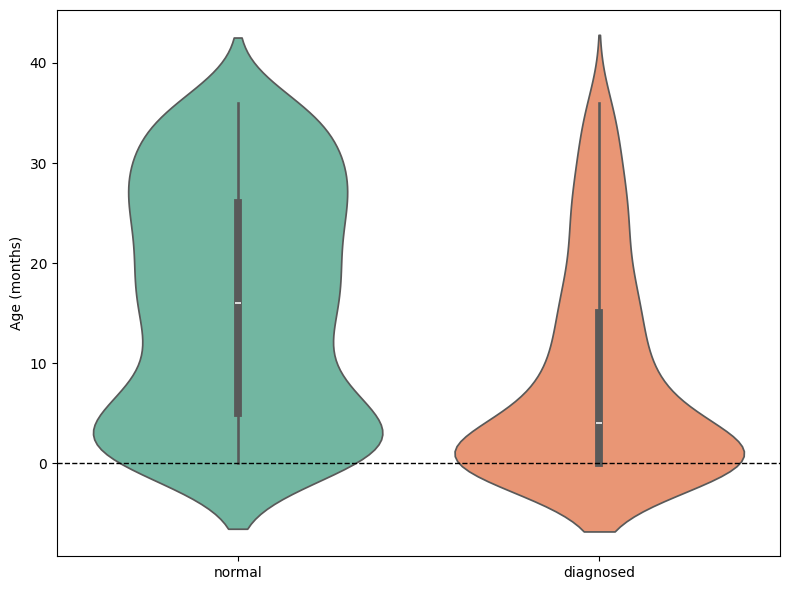

In [8]:
# Create a new column for group labels
df['diagnosis_group'] = df['diagnosis'].apply(lambda x: 'normal' if x.lower() == 'normal' else 'diagnosed')

# Make the violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(x='diagnosis_group', y='age', data=df, palette='Set2')
plt.axhline(y=0, color='k', linestyle='--', lw=1)

plt.xlabel('')
plt.ylabel('Age (months)')
plt.tight_layout()
plt.show()


In [9]:
df['diagnosis'].unique()

array(['normal', 'premature', 'postoperative', 'Leigh Syndrome',
       'brain oedem', 'heterotopia', 'polymicroglia', 'HIE',
       'Hydrocephalus', 'HIE ', 'Premature, PVL', 'encephalocele',
       'Meningitis', 'Premature, PVL, hydrocephalus', 'subdural hygrom',
       'premature, HIE', 'Infarct', 'cerebellar calcification',
       'searing injuries', 'Corpus callosum agenesis',
       'Mithocondriopathy', 'macrocephaly', 'Gliotic foci',
       'premature, hydrocephalus',
       'Delayed myelinisation, cerebral atrophy', 'PVL',
       'Congenital CMV infection', 'cerebral atrophy', 'Arachnoidal cyst',
       'Intracerebral hemorrhage', 'cerebral/cerebellar atrophy',
       'subdurale hemorrhagy', 'Plagiocephaly', 'craniosynostosis',
       'encephalomalasy', 'Macrocephaly', 'Brachycephaly',
       'Septooptic dysplasy', 'Motion artefact',
       'subararachnoidal hemorrhage', 'Premature, Infarct', 'Meningocele',
       'premature, infarct', 'Arnold Chiari Malformation',
       'prem

In [10]:
df_grouped = (
    df.groupby('diagnosis')
      .agg(counts=('diagnosis', 'size'),
           mean_age=('age', 'mean'),
           std_age=('age', 'std'),
           median_age=('age', 'median'),
           min_age=('age', 'min'),
           max_age=('age', 'max'))
      .reset_index()
      .sort_values(by='counts', ascending=False)
)

df_grouped.head(10)


,diagnosis,counts,mean_age,std_age,median_age,min_age,max_age
59,normal,565,16.090265,11.625540,16.0,0,36
13,HIE,45,0.422222,1.514909,0.0,0,8
16,Hydrocephalus,30,13.500000,9.779465,11.5,0,35
17,Infarct,21,2.238095,5.195236,0.0,0,17
21,Meningitis,17,8.294118,6.351818,6.0,0,21
62,premature,9,7.111111,9.184830,2.0,0,26
72,subdurale hemorrhagy,8,4.500000,5.424811,3.0,0,15
43,cerebral atrophy,8,12.625000,6.139742,11.5,5,22
12,Gliotic foci,7,22.142857,11.610750,25.0,0,33
18,Intracerebral hemorrhage,7,8.142857,13.545338,0.0,0,35


In [11]:
df_sel = df[df['diagnosis'] == 'Infarct']
sample_image = df_sel['image_id'].iloc[0]
sample_image

's0088'

In [2]:
def plot_mri_images(t1_path, t2_path):
    # Load images using nibabel
    t1_img = nib.load(t1_path).get_fdata()
    t2_img = nib.load(t2_path).get_fdata()
    
    # Helper to get middle slices
    def get_middle_slices(img):
        x_middle = img[img.shape[0] // 2, :, :]
        y_middle = img[:, img.shape[1] // 2, :]
        z_middle = img[:, :, img.shape[2] // 2]
        return x_middle, y_middle, z_middle
    
    t1_slices = get_middle_slices(t1_img)
    t2_slices = get_middle_slices(t2_img)
    
    # Plotting
    fig, axes = plt.subplots(2, 3, figsize=(12, 8))
    titles = ['Axial (X)', 'Coronal (Y)', 'Sagittal (Z)']
    
    # T1-weighted images
    for idx, slice_img in enumerate(t1_slices):
        axes[0, idx].imshow(np.rot90(slice_img), cmap='gray')
        axes[0, idx].set_title(f'T1 {titles[idx]}')
        axes[0, idx].axis('off')
    
    # T2-weighted images
    for idx, slice_img in enumerate(t2_slices):
        axes[1, idx].imshow(np.rot90(slice_img), cmap='gray')
        axes[1, idx].set_title(f'T2 {titles[idx]}')
        axes[1, idx].axis('off')
    
    plt.tight_layout()
    plt.show()

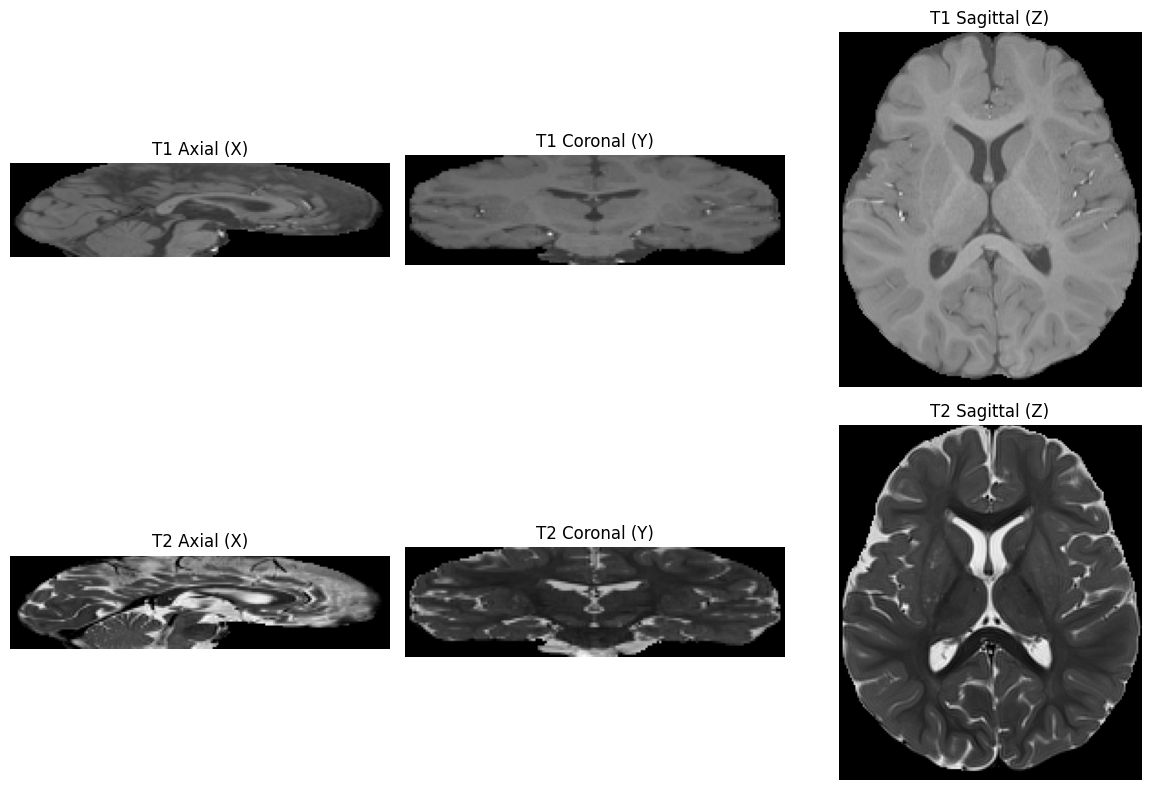

In [12]:
t1_scan = r'..\..\Datasets\Basel_mri\{}\t1.nii.gz'.format(sample_image)
t2_scan = r'..\..\Datasets\Basel_mri\{}\t2.nii.gz'.format(sample_image)
plot_mri_images(t1_scan, t2_scan)

In [15]:
t1_img = nib.load(t1_scan).get_fdata()
t1_img.shape

(166, 195, 48)

In [19]:
t1_img = nib.load(t1_scan)
print(t1_img.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : np.bytes_(b'')
db_name         : np.bytes_(b'')
extents         : 0
session_error   : 0
regular         : np.bytes_(b'')
dim_info        : 0
dim             : [  3 166 195  48   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float64
bitpix          : 64
slice_start     : 0
pixdim          : [-1.          0.78125     0.78124994  2.2         1.          1.
  1.          1.        ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : np.bytes_(b'')
aux_file        : np.bytes_(b'')
qform_code      : unknown
sform_code      : aligned
quatern_b       : 0.015712505
quatern_c       : 0.9937047
quatern_d

further analysis? can we use the dataset with its resolution?

In [ ]:
# Check and start Docker if necessary
if not ut.is_docker_running():
    print("Docker is not running. Starting it now...")
    ut.start_docker()
else:
    print("Docker is running.")